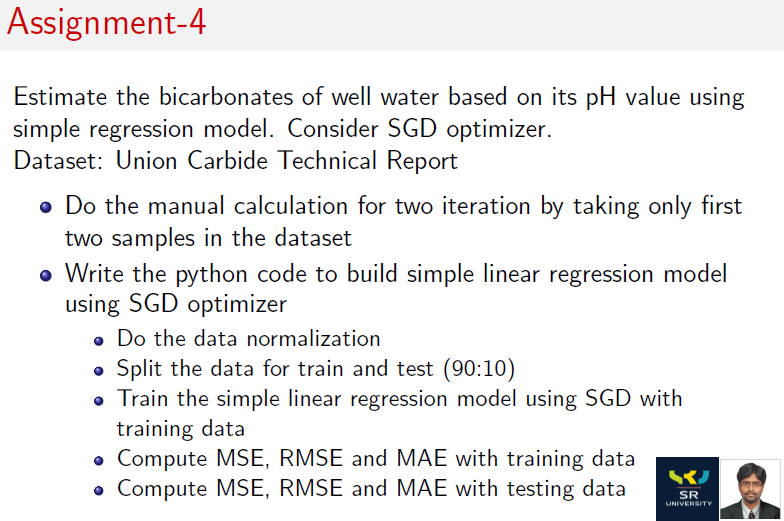

In [3]:
from PIL import Image
img = Image.open('Assignment-4 Q.png')
img

In [4]:
#Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [7]:
data = pd.read_csv('Assign4.csv')

In [8]:
xmax = np.max(data['X'])
xmin = np.min(data['X'])
data['X'] = (data['X'] - xmin)/(xmax - xmin)

In [9]:
ymax = np.max(data['Y'])
ymin = np.min(data['Y'])
data['Y'] = (data['Y'] - ymin)/(ymax - ymin)

In [10]:
data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [11]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [12]:
x = data['X']
y = data['Y']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=101)

In [13]:
eeta = 0.1
epochs = 1000
m = np.random.uniform(-30,30)
c = np.random.uniform(-30,30)
for _ in range(epochs):
    for i in range(xtrain.shape[0]):
        gradm = -1 * xtrain.iloc[i] * (ytrain.iloc[i] - m * xtrain.iloc[i] - c)
        gradc = -1 * (ytrain.iloc[i] - m * xtrain.iloc[i] - c)
        m = m - eeta * gradm
        c = c - eeta * gradc
print(m,c)

-0.39612119787803735 0.6408628314667917


In [14]:
ytrainPred = []
for x in xtrain:
    ytrainPred.append(m*x+c)
    
ytestPred = []
for x in xtest:
    ytestPred.append(m*x+c)

In [15]:
MAE_BD_Train = mean_absolute_error(ytrainPred, ytrain) #Training MAE Before Denormalization
MSE_BD_Train = mean_squared_error(ytrainPred, ytrain) #Training MSE Before Denormalization
RMSE_BD_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Training RMSE Before Denormalization
MAE_BD_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE Before Denormalization
MSE_BD_Test = mean_squared_error(ytestPred, ytest) #Testing MSE Before Denormalization
RMSE_BD_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE Before Denormalization
print('Training Error before denormalization :')
print('Mean Absolute Error :', MAE_BD_Train)
print('Mean Squared Error :', MSE_BD_Train)
print('Root Mean Squared Error :', RMSE_BD_Train)
print('\nTesting Error before denormalization :')
print('Mean Absolute Error :', MAE_BD_Test)
print('Mean Squared Error :', MSE_BD_Test)
print('Root Mean Squared Error :', RMSE_BD_Test)

Training Error before denormalization :
Mean Absolute Error : 0.1977638439355659
Mean Squared Error : 0.051413180543139994
Root Mean Squared Error : 0.2267447475535872

Testing Error before denormalization :
Mean Absolute Error : 0.19782694051134408
Mean Squared Error : 0.05829480678203417
Root Mean Squared Error : 0.24144317505788845


In [16]:
xtrain = xtrain * (xmax-xmin) + xmin
ytrain = ytrain * (ymax-ymin) + ymin
xtest = xtest * (xmax-xmin) + xmin
ytest = ytest * (ymax-ymin) + ymin
ytrainPred = np.multiply(ytrainPred, (ymax-ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax-ymin)) + ymin

In [17]:
MAE_AD_Train = mean_absolute_error(ytrainPred, ytrain) #Testing MAE After Denormalization
MSE_AD_Train = mean_squared_error(ytrainPred, ytrain) #Testing MSE After Denormalization
RMSE_AD_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Testing RMSE After Denormalization
MAE_AD_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE After Denormalization
MSE_AD_Test = mean_squared_error(ytestPred, ytest) #Testing MSE After Denormalization
RMSE_AD_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE After Denormalization
print('Training Error after denormalization :')
print('Mean Absolute Error :', MAE_AD_Train)
print('Mean Squared Error :', MSE_AD_Train)
print('Root Mean Squared Error :', RMSE_AD_Train)
print('\nTesting Error after denormalization :')
print('Mean Absolute Error :', MAE_AD_Test)
print('Mean Squared Error :', MSE_AD_Test)
print('Root Mean Squared Error :', RMSE_AD_Test)

Training Error after denormalization :
Mean Absolute Error : 44.89239257337347
Mean Squared Error : 2649.269780207459
Root Mean Squared Error : 51.47105769466428

Testing Error after denormalization :
Mean Absolute Error : 44.9067154960751
Mean Squared Error : 3003.8730986714386
Root Mean Squared Error : 54.80760073814068


In [18]:
pd.DataFrame({'X_Train':xtrain, 'Y_Train':ytrain, 'Y_Train_Prediction':ytrainPred}).reset_index()

,index,X_Train,Y_Train,Y_Train_Prediction
0,29,8.5,48.0,103.401995
1,26,8.4,35.0,107.683877
2,25,7.7,113.0,137.657048
3,27,7.4,125.0,150.502692
4,33,7.3,87.0,154.784574
5,2,8.2,175.0,116.247640
6,28,7.3,76.0,154.784574
7,19,7.9,155.0,129.093285
8,16,8.5,82.0,103.401995
9,10,8.1,215.0,120.529521


In [19]:
pd.DataFrame({'X_Test':xtest,'Y_Test':ytest,'Y_Test_Prediction':ytestPred}).reset_index()

,index,X_Test,Y_Test,Y_Test_Prediction
0,18,8.2,202.0,116.247640
1,7,8.0,190.0,124.811403
2,20,7.6,157.0,141.938929
3,30,7.8,147.0,133.375166


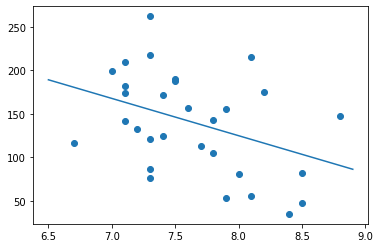

In [20]:
plt.scatter(np.array(xtrain,xtest), np.array(ytrain,ytest))
x = np.array([i/10 for i in range(65,90)])
y = (m*(x-xmin)/(xmax-xmin)+c) * (ymax-ymin) + ymin
plt.plot(x,y)
plt.show()